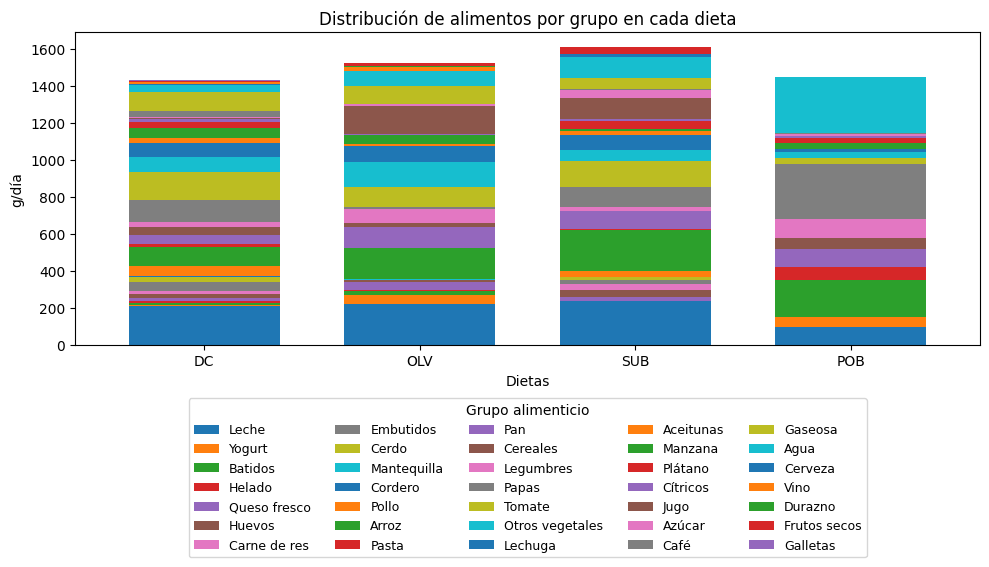

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data_final/dietas_consumo.csv", encoding="utf-8-sig")

#categorías como índice y transpón para tener dietas en filas
df = df.set_index("Categoría").T   # ahora tiene índice ['DC','OLV','SUB','POB']

#bar chart apilado
ax = df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    width=0.7
)

#etiquetas y título
ax.set_xlabel("Dietas")
ax.set_ylabel("g/día")
ax.set_title("Distribución de alimentos por grupo en cada dieta")
plt.xticks(rotation=0)

#leyenda
plt.legend(
    title="Grupo alimenticio",
    bbox_to_anchor=(0.5, -0.15),
    loc="upper center",
    ncol=5,
    fontsize=9
)

plt.tight_layout()
plt.show()


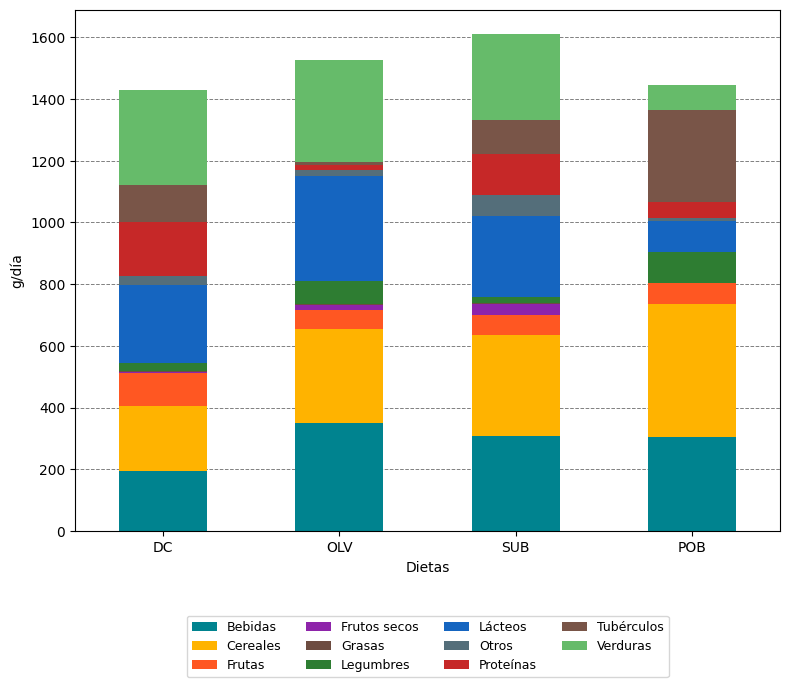

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data_final/dietas_consumo.csv", encoding="utf-8-sig")
df = df.set_index("Categoría")

#mapeo categoría → macrogrupo
macro = {
    'Carne de res':'Proteínas', 'Cordero':'Proteínas','Cerdo':'Proteínas',     # Proteínas animales
    'Pollo':'Proteínas','Embutidos':'Proteínas','Huevos':'Proteínas',
    'Leche':'Lácteos','Yogurt':'Lácteos','Batidos':'Lácteos',   # Lácteos
    'Helado':'Lácteos','Queso fresco':'Lácteos',
    'Arroz':'Cereales','Pasta':'Cereales','Pan':'Cereales','Cereales':'Cereales', # Cereales y tubérculos
    'Galletas':'Cereales','Papas':'Tubérculos',
    'Legumbres':'Legumbres',        # Legumbres
    'Tomate':'Verduras','Lechuga':'Verduras','Otros vegetales':'Verduras', # Verduras
    'Manzana':'Frutas','Plátano':'Frutas','Cítricos':'Frutas','Durazno':'Frutas',   # Frutas
    'Aceite de oliva':'Grasas','Aceite vegetal':'Grasas','Mantequilla':'Grasas', # Grasas y aceites
    'Frutos secos':'Frutos secos',  # Frutos secos y semillas
    'Agua':'Bebidas','Jugo':'Bebidas','Gaseosa':'Bebidas','Cerveza':'Bebidas','Vino':'Bebidas','Café':'Bebidas', # Bebidas
    'Azúcar':'Otros','Aceitunas':'Otros'    # Dulces y otros
}

#mapear
df['Macro'] = df.index.map(macro)
consumo_macro = df.groupby('Macro').sum().T

#paleta colores
colors = {
    'Proteínas':'#c62828',    # rojo oscuro
    'Lácteos':'#1565c0',      # azul
    'Cereales':'#ffb300',     # naranja-amarillo
    'Tubérculos':'#795548',   # marrón terroso
    'Legumbres':'#2e7d32',    # verde oscuro
    'Verduras':'#66bb6a',     # verde claro
    'Frutas':'#ff5722',       # coral
    'Grasas':'#6d4c41',       # marrón medio
    'Frutos secos':'#8e24aa', # púrpura
    'Bebidas':'#00838f',      # turquesa
    'Otros':'#546e7a'         # gris azulado
}

fig, ax = plt.subplots(figsize=(8,7))
consumo_macro.plot(
    kind='bar', stacked=True, ax=ax,
    color=[colors[c] for c in consumo_macro.columns]
)

ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')

ax.set_xlabel("Dietas")
ax.set_ylabel("g/día")
plt.xticks(rotation=0)
plt.legend(
    bbox_to_anchor=(0.5, -0.15), loc='upper center',
    ncol=4, fontsize=9
)

plt.tight_layout()
plt.show()

C:\Users\afp20\AppData\Local\Temp\ipykernel_16340\161319596.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.2324521594433098' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cost.loc[cat] = df_cost.loc[cat] * grp.loc[cat,"precio_por_g"]
C:\Users\afp20\AppData\Local\Temp\ipykernel_16340\161319596.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.2911403575120388' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cost.loc[cat] = df_cost.loc[cat] * grp.loc[cat,"precio_por_g"]
C:\Users\afp20\AppData\Local\Temp\ipykernel_16340\161319596.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.408516753649497' has dtype incompatible with int64, please explicitly cast to a compatible dt

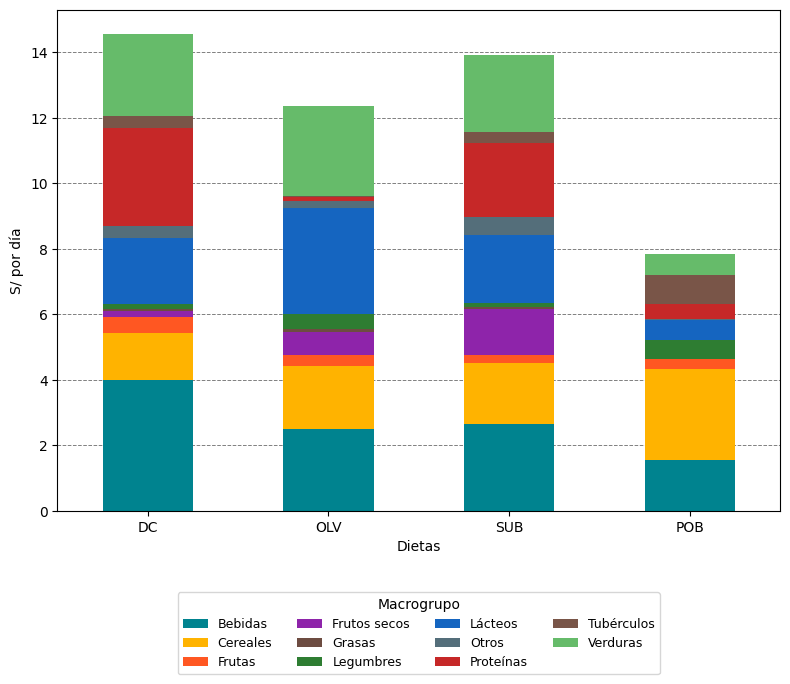

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_cons = pd.read_csv("../data_final/dietas_consumo.csv", encoding="utf-8-sig")
df_cons = df_cons.set_index("Categoría")

#carga precios y calcula precio por gramo
df_price = pd.read_csv("../data_final/nutrientes_alimentos_agrupados_precios.csv", encoding="utf-8-sig")
grp = df_price.groupby("Grupo").agg({"Precio":"sum","Gramos":"sum"})
grp["precio_por_g"] = grp["Precio"]/grp["Gramos"]

#filtra categorías comunes y calcula costo = consumo (g) * precio_por_g
df_cost = df_cons.copy()
for cat in df_cost.index:
    if cat in grp.index:
        df_cost.loc[cat] = df_cost.loc[cat] * grp.loc[cat,"precio_por_g"]
    else:
        df_cost.loc[cat] = 0

#macro mapeo
macro = {
    'Carne de res':'Proteínas', 'Cordero':'Proteínas','Cerdo':'Proteínas',
    'Pollo':'Proteínas','Embutidos':'Proteínas','Huevos':'Proteínas',
    'Leche':'Lácteos','Yogurt':'Lácteos','Batidos':'Lácteos','Helado':'Lácteos','Queso fresco':'Lácteos',
    'Arroz':'Cereales','Pasta':'Cereales','Pan':'Cereales','Cereales':'Cereales','Galletas':'Cereales',
    'Papas':'Tubérculos','Legumbres':'Legumbres',
    'Tomate':'Verduras','Lechuga':'Verduras','Otros vegetales':'Verduras',
    'Manzana':'Frutas','Plátano':'Frutas','Cítricos':'Frutas','Durazno':'Frutas',
    'Aceite de oliva':'Grasas','Aceite vegetal':'Grasas','Mantequilla':'Grasas',
    'Frutos secos':'Frutos secos',
    'Agua':'Bebidas','Jugo':'Bebidas','Gaseosa':'Bebidas','Cerveza':'Bebidas','Vino':'Bebidas','Café':'Bebidas',
    'Azúcar':'Otros','Aceitunas':'Otros'
}

df_cost["Macro"] = df_cost.index.map(macro)
cost_macro = df_cost.groupby("Macro").sum().T

#colores
colors = {
    'Proteínas':'#c62828','Lácteos':'#1565c0','Cereales':'#ffb300','Tubérculos':'#795548',
    'Legumbres':'#2e7d32','Verduras':'#66bb6a','Frutas':'#ff5722','Grasas':'#6d4c41',
    'Frutos secos':'#8e24aa','Bebidas':'#00838f','Otros':'#546e7a'
}

#gráfico
fig, ax = plt.subplots(figsize=(8,7))
cost_macro.plot(kind='bar', stacked=True, ax=ax, color=[colors[c] for c in cost_macro.columns])
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
ax.set_xlabel("Dietas")
ax.set_ylabel("S/ por día")
plt.xticks(rotation=0)
plt.legend(title="Macrogrupo", bbox_to_anchor=(0.5,-0.15), loc='upper center', ncol=4, fontsize=9)
plt.tight_layout()
plt.show()